- Environment Setup

In [1]:
import numpy as np
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

from wrangle import clean_311

import model

from model import split_separate_scale, dummy_dept, dummy_call_reason, make_source_id_dummies

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Acquire and Prep

In [3]:
# acquire data
df = pd.read_csv('service_calls.csv')

In [4]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,2020-05-15T00:00:00,2021-05-15T00:00:00


In [5]:
df.shape

(495440, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

In [7]:
df = clean_311(df)

In [8]:
df = dummy_dept(df)
df = dummy_call_reason(df)
df = make_source_id_dummies(df)

In [9]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1393.0,8,-1385.0,174.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1393.0,8,-1385.0,174.125,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1386.0,8,-1378.0,173.250,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1386.0,8,-1378.0,173.250,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1361.0,8,-1353.0,170.125,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df.shape

(356804, 63)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   open_date                   356804 non-null  datetime64[ns]
 1   due_date                    356804 non-null  datetime64[ns]
 2   closed_date                 356804 non-null  datetime64[ns]
 3   is_late                     356804 non-null  object        
 4   dept                        356804 non-null  object        
 5   call_reason                 356804 non-null  object        
 6   case_type                   356804 non-null  object        
 7   case_status                 356804 non-null  object        
 8   source_id                   356804 non-null  object        
 9   address                     356804 non-null  object        
 10  council_district            356804 non-null  int64         
 11  longitude                   356804 no

In [12]:
df.isnull().sum()

open_date                     0
due_date                      0
closed_date                   0
is_late                       0
dept                          0
call_reason                   0
case_type                     0
case_status                   0
source_id                     0
address                       0
council_district              0
longitude                     0
latitude                      0
days_open                     0
resolution_days_due           0
days_before_or_after_due      0
pct_time_of_used              0
level_of_delay                0
district_1                    0
district_2                    0
district_3                    0
district_4                    0
district_5                    0
district_6                    0
district_7                    0
district_8                    0
district_9                    0
district_10                   0
voter_turnout_2019            0
num_of_registered_voters      0
zipcode                       0
open_mon

# Extract Month, Year, and Week from open_date

In [13]:
df['open_month'] = df.open_date.dt.month

In [14]:
df['open_year'] = df.open_date.dt.year

In [15]:
df['open_week'] = df.open_date.dt.week

In [16]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1393.0,8,-1385.0,174.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1393.0,8,-1385.0,174.125,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1386.0,8,-1378.0,173.250,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1386.0,8,-1378.0,173.250,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1361.0,8,-1353.0,170.125,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
df.open_month.value_counts()

6     36787
4     36524
3     34883
7     34483
5     33693
8     31960
9     26599
10    26014
11    24548
1     23942
12    23894
2     23477
Name: open_month, dtype: int64

In [18]:
df.open_year.value_counts()

2020    232579
2021    119514
2019      3108
2018      1219
2017       384
Name: open_year, dtype: int64

In [19]:
df.open_week.value_counts()

23    8825
24    8696
14    8664
15    8608
18    8463
12    8393
25    8190
16    8090
28    8078
17    8045
29    8023
26    8019
22    7927
11    7806
13    7772
32    7737
33    7727
30    7643
21    7492
10    7479
9     7434
31    7354
34    7267
27    7211
35    7195
8     6838
36    6704
6     6557
47    6319
43    6205
5     6198
38    6194
49    6158
45    6082
37    6000
39    5905
41    5892
4     5864
44    5857
1     5856
42    5819
46    5793
50    5704
51    5604
40    5589
3     5564
2     5519
19    5226
48    4973
20    4806
53    4218
52    4115
7     3107
Name: open_week, dtype: int64

In [20]:
def extract_time(df):
    '''
    This function will take in a dataframe and return it with new features extracted from the open_date column
    - open_month: which month the case was opened in
    - open_year: which year the case was opened in
    - open_week: which week the case was opened in
    '''
    
    # extract month from open_date
    df['open_month'] = df.open_date.dt.month
    
    # extract year from open_date
    df['open_year'] = df.open_date.dt.year
    
    # extract week from open_date
    df['open_week'] = df.open_date.dt.week
    
    return df

In [21]:
# acquire data
#test_df = pd.read_csv('allservicecalls.csv')

In [22]:
#est_df.head()

In [23]:
#test_df = clean_311(test_df)

In [24]:
#test_df.head()

In [25]:
#test_df.info()

In [26]:
#test_df = extract_time(test_df)

In [27]:
#test_df.head()

In [28]:
#test_df.info()

In [29]:
#test_df.open_month.value_counts()

In [30]:
#test_df.open_year.value_counts()

In [31]:
#test_df.open_week.value_counts()

# Explore

<AxesSubplot:xlabel='open_week'>

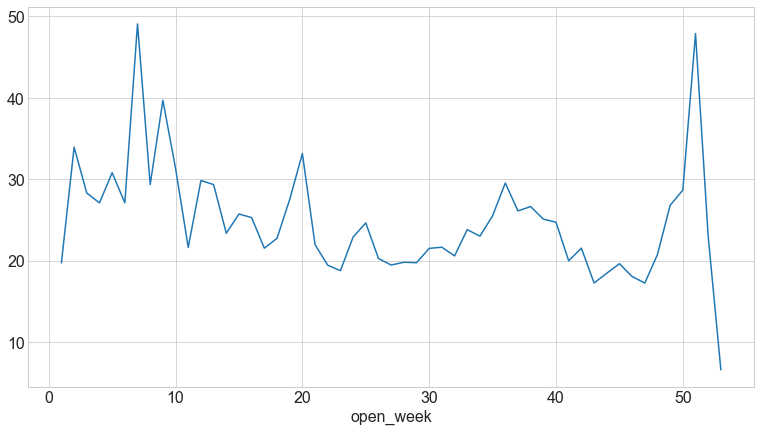

In [32]:
df.groupby('open_week').days_open.mean().plot()

<AxesSubplot:xlabel='open_month'>

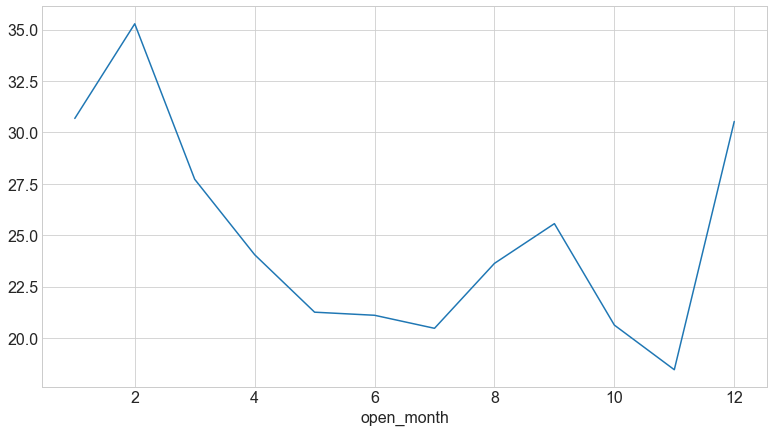

In [33]:
df.groupby('open_month').days_open.mean().plot()

In [34]:
df.groupby('open_month').call_reason.value_counts()

open_month  call_reason     
1           waste               10224
            code                 4989
            field                4558
            misc                 1368
            trades                743
            streets               659
            traffic               556
            customer_service      351
            storm                 188
            land                  120
            license                96
            business               79
            buildings              11
2           waste                8649
            field                6164
            code                 5249
            misc                 1097
            trades                627
            streets               577
            traffic               416
            customer_service      322
            storm                 128
            land                   91
            business               86
            license                56
            buildings

In [35]:
df.groupby('open_month').dept.value_counts()

open_month  dept                     
1           Solid Waste Management       11706
            Development Services          4959
            Animal Care Services          4564
            Trans & Cap Improvements      1385
            Unknown                        868
            Customer Service               182
            Metro Health                   177
            Code Enforcement Services      101
2           Solid Waste Management        9859
            Animal Care Services          6174
            Development Services          5193
            Trans & Cap Improvements      1087
            Unknown                        741
            Customer Service               163
            Metro Health                   143
            Code Enforcement Services      117
3           Solid Waste Management       18444
            Development Services          7960
            Animal Care Services          5249
            Trans & Cap Improvements      1613
            Unknown   

In [36]:
df.groupby('open_month').council_district.value_counts()

open_month  council_district
1           3                   3285
            2                   3279
            1                   3135
            5                   3069
            4                   2326
            7                   2302
            10                  1995
            6                   1965
            9                   1332
            8                   1254
2           5                   3471
            2                   3223
            3                   3086
            1                   3079
            4                   2406
            7                   2185
            6                   1898
            10                  1825
            8                   1183
            9                   1121
3           2                   4484
            5                   4333
            1                   4314
            3                   4211
            7                   3534
            4                   3257
         

In [37]:
df.groupby('open_month').level_of_delay.value_counts()

open_month  level_of_delay     
1           Very Early Response    12779
            Early Response          4636
            Late Response           4392
            On Time Response        1798
            Very Late Response       337
2           Very Early Response    11241
            Late Response           6329
            Early Response          3822
            On Time Response        1200
            Very Late Response       885
3           Very Early Response    16782
            Late Response           7332
            Early Response          7137
            On Time Response        2894
            Very Late Response       738
4           Very Early Response    19015
            Late Response           7941
            Early Response          6202
            On Time Response        2668
            Very Late Response       698
5           Very Early Response    19853
            Early Response          6662
            Late Response           4864
            On Time Respo

In [38]:
df.groupby('open_month').is_late.value_counts()

open_month  is_late
1           NO         20320
            YES         3622
2           NO         17361
            YES         6116
3           NO         28282
            YES         6601
4           NO         29452
            YES         7072
5           NO         29756
            YES         3937
6           NO         32792
            YES         3995
7           NO         31079
            YES         3404
8           NO         28264
            YES         3696
9           NO         22995
            YES         3604
10          NO         22940
            YES         3074
11          NO         21951
            YES         2597
12          NO         20537
            YES         3357
Name: is_late, dtype: int64

In [39]:
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm

In [40]:
import math

from math import sqrt

In [41]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the months a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_month== 1],
        train.days_open[train.open_month== 2],
        train.days_open[train.open_month== 3],
        train.days_open[train.open_month== 4],
        train.days_open[train.open_month== 5],
        train.days_open[train.open_month== 6],
        train.days_open[train.open_month== 7], 
        train.days_open[train.open_month== 8], 
        train.days_open[train.open_month== 9], 
        train.days_open[train.open_month== 10],
        train.days_open[train.open_month== 11],
        train.days_open[train.open_month== 12]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [42]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the months a case is opened in.


In [43]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the year a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_year== 2018],
        train.days_open[train.open_year== 2019],
        train.days_open[train.open_year== 2020],
        train.days_open[train.open_year== 2021]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [44]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the year a case is opened in.


In [45]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the week a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_week== 1],
        train.days_open[train.open_week== 2],
        train.days_open[train.open_week== 3],
        train.days_open[train.open_week== 4],
        train.days_open[train.open_week== 5],
        train.days_open[train.open_week== 6],
        train.days_open[train.open_week== 7], 
        train.days_open[train.open_week== 8], 
        train.days_open[train.open_week== 9], 
        train.days_open[train.open_week== 10],
        train.days_open[train.open_week== 11],
        train.days_open[train.open_week== 12],
        train.days_open[train.open_week== 13],
        train.days_open[train.open_week== 14],
        train.days_open[train.open_week== 15],
        train.days_open[train.open_week== 16],
        train.days_open[train.open_week== 17], 
        train.days_open[train.open_week== 18], 
        train.days_open[train.open_week== 19], 
        train.days_open[train.open_week== 20],
        train.days_open[train.open_week== 21],
        train.days_open[train.open_week== 22],
        train.days_open[train.open_week== 23],
        train.days_open[train.open_week== 24],
        train.days_open[train.open_week== 25],
        train.days_open[train.open_week== 26],
        train.days_open[train.open_week== 27], 
        train.days_open[train.open_week== 28], 
        train.days_open[train.open_week== 29], 
        train.days_open[train.open_week== 30],
        train.days_open[train.open_week== 31],
        train.days_open[train.open_week== 32],
        train.days_open[train.open_week== 33],
        train.days_open[train.open_week== 34],
        train.days_open[train.open_week== 35],
        train.days_open[train.open_week== 36],
        train.days_open[train.open_week== 37], 
        train.days_open[train.open_week== 38], 
        train.days_open[train.open_week== 39], 
        train.days_open[train.open_week== 40],
        train.days_open[train.open_week== 41],
        train.days_open[train.open_week== 42],
        train.days_open[train.open_week== 43],
        train.days_open[train.open_week== 44],
        train.days_open[train.open_week== 45],
        train.days_open[train.open_week== 46],
        train.days_open[train.open_week== 47], 
        train.days_open[train.open_week== 48], 
        train.days_open[train.open_week== 49], 
        train.days_open[train.open_week== 50],
        train.days_open[train.open_week== 51],
        train.days_open[train.open_week== 52],
        train.days_open[train.open_week== 53]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [46]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the week a case is opened in.


In [47]:
H0 = 'there is no difference in days a case is open between month 1 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 1 and the general population'

alpha = .05

month1 = df[df['open_month'] == 1]

μ = df.days_open.mean()
xbar = month1.days_open.mean()
s = month1.days_open.std()
n = month1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

8.522342819880308
1.6544284870989064e-17
there is a significant difference between the days a case is open between month 1 and the general population


In [48]:
H0 = 'there is no difference in days a case is open between month 2 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 2 and the general population'

alpha = .05

month2 = df[df['open_month'] == 2]

μ = df.days_open.mean()
xbar = month2.days_open.mean()
s = month2.days_open.std()
n = month2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

15.474609514270584
9.490547015508208e-54
there is a significant difference between the days a case is open between month 2 and the general population


In [49]:
H0 = 'there is no difference in days a case is open between month 3 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 3 and the general population'

alpha = .05

month3 = df[df['open_month'] == 3]

μ = df.days_open.mean()
xbar = month3.days_open.mean()
s = month3.days_open.std()
n = month3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

6.073475488213158
1.264629381778907e-09
there is a significant difference between the days a case is open between month 3 and the general population


In [50]:
H0 = 'there is no difference in days a case is open between month 4 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 4 and the general population'

alpha = .05

month4 = df[df['open_month'] == 4]

μ = df.days_open.mean()
xbar = month4.days_open.mean()
s = month4.days_open.std()
n = month4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-1.0932874457690704
1.7257251759946337
there is no difference in days a case is open between month 4 and the rest of the population


In [51]:
H0 = 'there is no difference in days a case is open between month 5 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 5 and the general population'

alpha = .05

month5 = df[df['open_month'] == 5]

μ = df.days_open.mean()
xbar = month5.days_open.mean()
s = month5.days_open.std()
n = month5.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-7.33647160242466
1.9999999999997757
there is no difference in days a case is open between month 5 and the rest of the population


In [52]:
H0 = 'there is no difference in days a case is open between month 6 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 6 and the general population'

alpha = .05

month6 = df[df['open_month'] == 6]

μ = df.days_open.mean()
xbar = month6.days_open.mean()
s = month6.days_open.std()
n = month6.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-8.810990753744496
2.0
there is no difference in days a case is open between month 6 and the rest of the population


In [53]:
H0 = 'there is no difference in days a case is open between month 7 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 7 and the general population'

alpha = .05

month7 = df[df['open_month'] == 7]

μ = df.days_open.mean()
xbar = month7.days_open.mean()
s = month7.days_open.std()
n = month7.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-10.136293007130439
2.0
there is no difference in days a case is open between month 7 and the rest of the population


In [54]:
H0 = 'there is no difference in days a case is open between month 8 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 8 and the general population'

alpha = .05

month8 = df[df['open_month'] == 8]

μ = df.days_open.mean()
xbar = month8.days_open.mean()
s = month8.days_open.std()
n = month8.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-2.100824463307345
1.964335809330585
there is no difference in days a case is open between month 8 and the rest of the population


In [55]:
H0 = 'there is no difference in days a case is open between month 9 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 9 and the general population'

alpha = .05

month9 = df[df['open_month'] == 9]

μ = df.days_open.mean()
xbar = month9.days_open.mean()
s = month9.days_open.std()
n = month9.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

1.957463404487783
0.05030345250035832
there is no difference in days a case is open between month 9 and the rest of the population


In [56]:
H0 = 'there is no difference in days a case is open between month 10 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 10 and the general population'

alpha = .05

month10 = df[df['open_month'] == 10]

μ = df.days_open.mean()
xbar = month10.days_open.mean()
s = month10.days_open.std()
n = month10.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-6.58234908694201
1.9999999999528117
there is no difference in days a case is open between month 10 and the rest of the population


In [57]:
H0 = 'there is no difference in days a case is open between month 11 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 11 and the general population'

alpha = .05

month11 = df[df['open_month'] == 11]

μ = df.days_open.mean()
xbar = month11.days_open.mean()
s = month11.days_open.std()
n = month11.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-10.783714167135098
2.0
there is no difference in days a case is open between month 11 and the rest of the population


In [58]:
H0 = 'there is no difference in days a case is open between month 12 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 12 and the general population'

alpha = .05

month12 = df[df['open_month'] == 12]

μ = df.days_open.mean()
xbar = month12.days_open.mean()
s = month12.days_open.std()
n = month12.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

8.373862704257544
5.878317253684033e-17
there is a significant difference between the days a case is open between month 12 and the general population


### Takeaways

- Winter months have the longest average case open time

- 'Waste' is continuously the most common reason across every month

- District 2 has the most cases opened during the Winter and Spring months

- District 5 has the most cases opened during the Autumn months 

- Feb, March, and April have the most cases categorized as late

- There does appear to be a significance between month a case is opened and days a case remains open

- Jan, Feb, March, Sep, and Dec are the only months with significant differences in days open compared to the population

- We can reject the null hypothesis that year and week are not significant to days open

# Modeling

In [59]:
from sklearn.metrics import classification_report, accuracy_score

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
from model import model_df

## Split Data

In [62]:
df = model_df()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   open_date                   356804 non-null  datetime64[ns]
 1   dept                        356804 non-null  object        
 2   call_reason                 356804 non-null  object        
 3   source_id                   356804 non-null  object        
 4   council_district            356804 non-null  int64         
 5   resolution_days_due         356804 non-null  int64         
 6   level_of_delay              356804 non-null  category      
 7   district_1                  356804 non-null  uint8         
 8   district_2                  356804 non-null  uint8         
 9   district_3                  356804 non-null  uint8         
 10  district_4                  356804 non-null  uint8         
 11  district_5                  356804 no

In [64]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df)

In [65]:
train.head()

,open_date,dept,call_reason,source_id,council_district,resolution_days_due,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests,open_month,open_year,open_week
196649,2020-10-19,Solid Waste Management,waste,Web Portal,5,4,Early Response,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,10,2020,43
192441,2020-10-14,Unknown,customer_service,Web Portal,10,8,Very Early Response,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,10,2020,42
119552,2020-08-03,Solid Waste Management,misc,Web Portal,6,3,Very Early Response,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,8,2020,32
336354,2021-03-26,Solid Waste Management,waste,Web Portal,10,8,Early Response,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2021,12
59110,2020-06-10,Development Services,code,Constituent Call,10,65,Late Response,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,2020,24


In [66]:
X_train.head()

,open_date,dept,call_reason,source_id,council_district,resolution_days_due,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests,open_month,open_year,open_week
196649,2020-10-19,Solid Waste Management,waste,Web Portal,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,10,2020,43
192441,2020-10-14,Unknown,customer_service,Web Portal,10,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,10,2020,42
119552,2020-08-03,Solid Waste Management,misc,Web Portal,6,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,8,2020,32
336354,2021-03-26,Solid Waste Management,waste,Web Portal,10,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2021,12
59110,2020-06-10,Development Services,code,Constituent Call,10,65,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,2020,24


In [67]:
train_scaled.head()

,council_district,resolution_days_due,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests,open_month,open_year,open_week
0,0.444444,0.003215,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.818182,0.75,0.807692
1,1.000000,0.007503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.818182,0.75,0.788462
2,0.555556,0.002144,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.636364,0.75,0.596154
3,1.000000,0.007503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.181818,1.00,0.211538
4,1.000000,0.068596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.454545,0.75,0.442308


### Establish Baseline

In [68]:
# look at values of target variable

y_train.value_counts()

Very Early Response    114280
Early Response          36971
Late Response           33599
On Time Response        11753
Very Late Response       3207
Name: level_of_delay, dtype: int64

In [69]:
# set up as dataframes
y_train = pd.DataFrame(dict(actual=y_train))
y_validate = pd.DataFrame(dict(actual=y_validate))
y_test = pd.DataFrame(dict(actual=y_test))

In [70]:
# 'Extremely Early Response' is by far the most frequent value so that will be our baseline
y_train['baseline'] = 'Very Early Response'

In [71]:
y_train.head()

,actual,baseline
196649,Early Response,Very Early Response
192441,Very Early Response,Very Early Response
119552,Very Early Response,Very Early Response
336354,Early Response,Very Early Response
59110,Late Response,Very Early Response


In [72]:
# calculate accuracy of baseline
baseline_accuracy = accuracy_score(y_train.actual, y_train.baseline)
print(' Baseline Accuracy: {:.2%}'.format(accuracy_score(y_train.actual, y_train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.baseline, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.baseline))

 Baseline Accuracy: 57.19%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
baseline                                                                     
Very Early Response               114280           36971             11753   

actual               Late Response  Very Late Response  
baseline                                                
Very Early Response          33599                3207  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.00      0.00      0.00     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.57      1.00      0.73    114280
 Very Late Response       0.00      0.00      0.00      3207

           accuracy                           0.57    199810
          macro avg       0.11      0.20      0.15    199810
       weighted avg       0.33      0.57      0.42  

#### Takeaways

- Using this iteration of of clean_311 the baseline accuracy drops from approx 75% to approx 48%

### Model 1 : Logistic Regression - Default Parameters / All Features

In [73]:
# make logistic regression object
log1 = LogisticRegression(random_state=123)

In [74]:
# fit logistic regression object to data
log1.fit(train_scaled, y_train.actual)

LogisticRegression(random_state=123)

In [75]:
# evaluate feature importance
print('Coefficient: \n', log1.coef_)
print('Intercept: \n', log1.intercept_)

Coefficient: 
 [[-1.94214095e-01 -8.39500177e+00 -1.22808659e-01 -3.01994834e-01
  -1.89092859e-01 -1.25358850e-01 -6.10868131e-02 -2.90185118e-02
  -1.06778650e-01  8.01705500e-03  1.76554515e-02  1.56754402e-02
  -8.77033133e-02 -1.07248126e+00 -8.74485438e-01  8.34574103e-02
   1.33749475e-01 -1.23689573e-02  9.66451657e-01  4.84867784e-02
  -7.98975808e-02 -2.17862091e-01  2.43757000e-01  8.30094566e-02
   3.81986377e-01 -1.13839895e+00 -6.51035624e-01 -3.99823785e-01
   2.81597967e-01  1.02949203e+00  2.33909285e-01  1.21558337e-02
  -2.85903547e-01  6.22829818e-01 -1.09050500e+00  2.36147997e-01
  -3.48635719e-01 -6.09862757e-01 -1.72440750e-01  2.54954283e-01
   2.37735853e+00  8.75924370e-01]
 [ 2.92202309e-02 -4.11256488e+00  7.82664840e-02  2.20743671e-01
   1.31822479e-01  1.82790990e-01 -6.73307443e-02  7.63217410e-02
   4.32752723e-02 -3.58371775e-03 -1.36931253e-01 -2.35342577e-03
  -2.13965742e-01  8.50918527e-01 -7.43852213e-01  8.22120071e-01
  -1.29502861e-01 -6.79999

In [76]:
log1_pred_proba = log1.predict_proba(train_scaled)

In [77]:
# make predictions
y_train['log1_pred'] = log1.predict(train_scaled)
y_validate['log1_pred'] = log1.predict(validate_scaled)
y_test['log1_pred'] = log1.predict(test_scaled)

In [78]:
y_train.head()

,actual,baseline,log1_pred
196649,Early Response,Very Early Response,Very Early Response
192441,Very Early Response,Very Early Response,Late Response
119552,Very Early Response,Very Early Response,Very Early Response
336354,Early Response,Very Early Response,Very Early Response
59110,Late Response,Very Early Response,Very Early Response


- Evaluate Model

In [79]:
# calculate accuracy of log1 on train

log1_accuracy_train = accuracy_score(y_train.actual, y_train.log1_pred)                                     
print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log1_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log1_pred))

 Log1 Accuracy: 59.30184%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log1_pred                                                                    
Early Response                       129              92                43   
Late Response                       4763            2700               553   
Very Early Response               109387           34174             11157   
Very Late Response                     1               5                 0   

actual               Late Response  Very Late Response  
log1_pred                                               
Early Response                  48                  13  
Late Response                 7319                 958  
Very Early Response          26058                 543  
Very Late Response             174                1693  
---
                     precision    recall  f1-score   support

     Early Response       0.28      0.00      0.00     36971
      Late Resp

In [80]:
# calculate accuracy of log1 on validate
log1_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log1_pred)
print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log1_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log1_pred))

 Log1 Accuracy: 59.34394%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log1_pred                                                                    
Early Response                        46              37                22   
Late Response                       2060            1161               238   
Very Early Response                46868           14645              4777   
Very Late Response                     4               2                 0   

actual               Late Response  Very Late Response  
log1_pred                                               
Early Response                  21                  11  
Late Response                 3155                 380  
Very Early Response          11152                 225  
Very Late Response              71                 758  
---
                     precision    recall  f1-score   support

     Early Response       0.27      0.00      0.00     15845
      Late Resp

#### Takeaways

- this model performs better on unseen validate data than the baseline by about 6%

- This model is less accuarate than the same model on iteration 1

### Feature Engineering

In [81]:
from sklearn.feature_selection import SelectKBest

In [82]:
f_selector = SelectKBest(k=8)

In [83]:
f_selector.fit(train_scaled, y_train.actual)

SelectKBest(k=8)

In [84]:
X_reduced = f_selector.transform(train_scaled)

print(train_scaled.shape)
print(X_reduced.shape)

(199810, 42)
(199810, 8)


In [85]:
f_support = f_selector.get_support()

print(f_support) 

[False  True False False False False False False False False False False
 False False  True  True False False  True False False False False False
 False  True  True False False False False False False False False False
  True False False False  True False]


In [86]:
f_feature = train_scaled.loc[:,f_support].columns.tolist()

# you could also get the list this way (among many others)
# f_feature = [X_train_scaled.columns.values[i] for i in range(len(feature_mask)) if feature_mask[i]==True]

print(str(len(f_feature)), 'selected features')
print(f_feature)

8 selected features
['resolution_days_due', 'customer_services', 'development_services', 'solid_waste_management', 'customer_service', 'field', '311_mobile_app', 'open_year']


In [87]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199810 entries, 0 to 199809
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   council_district            199810 non-null  float64
 1   resolution_days_due         199810 non-null  float64
 2   district_1                  199810 non-null  float64
 3   district_2                  199810 non-null  float64
 4   district_3                  199810 non-null  float64
 5   district_4                  199810 non-null  float64
 6   district_5                  199810 non-null  float64
 7   district_6                  199810 non-null  float64
 8   district_7                  199810 non-null  float64
 9   district_8                  199810 non-null  float64
 10  district_9                  199810 non-null  float64
 11  district_10                 199810 non-null  float64
 12  animal_care_services        199810 non-null  float64
 13  code_enforceme

#### Takeaways 

- 'days_before_or_after_due' and 'pct_time_of_used' are likely answer leak

- ['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app'] with dummies

- ['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income'] - without dummies

### Model 2 : Logistic Regression - Default Parameters / Select K Best Features (With Dummies)

In [88]:
# make model 2 subsets

model2_train = train_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model2_validate = validate_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model2_test = test_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]



In [89]:
model2_train.head()

,open_year,animal_care_services,customer_services,solid_waste_management,customer_service,field,misc,311_mobile_app
0,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.75,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
model2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199810 entries, 0 to 199809
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_year               199810 non-null  float64
 1   animal_care_services    199810 non-null  float64
 2   customer_services       199810 non-null  float64
 3   solid_waste_management  199810 non-null  float64
 4   customer_service        199810 non-null  float64
 5   field                   199810 non-null  float64
 6   misc                    199810 non-null  float64
 7   311_mobile_app          199810 non-null  float64
dtypes: float64(8)
memory usage: 12.2 MB


In [91]:
# make logistic regression object
log2 = LogisticRegression(random_state=123)

In [92]:
# fit logistic regression object to data
log2.fit(model2_train, y_train.actual)

LogisticRegression(random_state=123)

In [93]:
# evaluate feature importance
print('Coefficient: \n', log2.coef_)
print('Intercept: \n', log2.intercept_)

Coefficient: 
 [[ 2.14121992  0.0366815  -0.70740503  0.51269176 -0.66573017 -0.2434323
   1.6822771  -0.10194234]
 [ 1.80915419 -0.07341004 -0.72040289 -0.63895132 -0.68091911  0.23745116
  -1.30793615 -0.75266014]
 [ 3.30485085 -1.50285709 -0.39259945  0.19286329 -0.53746869  0.48242971
  -1.08782066 -0.2734791 ]
 [ 2.13039492  0.65081938 -2.41285295 -0.7354365  -0.46781461 -1.79806346
   1.52402673  0.01868033]
 [-9.38561988  0.88876625  4.23326032  0.66883276  2.35193257  1.3216149
  -0.81054703  1.10940125]]
Intercept: 
 [-1.17195392 -0.37406169 -2.8929971   0.79351091  3.64550181]


In [94]:
# make predictions
y_train['log2_pred'] = log2.predict(model2_train)
y_validate['log2_pred'] = log2.predict(model2_validate)
y_test['log2_pred'] = log2.predict(model2_test)

In [95]:
y_train.head()

,actual,baseline,log1_pred,log2_pred
196649,Early Response,Very Early Response,Very Early Response,Very Early Response
192441,Very Early Response,Very Early Response,Late Response,Very Early Response
119552,Very Early Response,Very Early Response,Very Early Response,Very Early Response
336354,Early Response,Very Early Response,Very Early Response,Very Early Response
59110,Late Response,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [96]:
# calculate accuracy of log2 on train
log2_accuracy_train = accuracy_score(y_train.actual, y_train.log2_pred)
print(' Log2 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log2_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log2_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log2_pred))

 Log2 Accuracy: 57.98609%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log2_pred                                                                    
Late Response                         22              14                26   
Very Early Response               114258           36957             11726   
Very Late Response                     0               0                 1   

actual               Late Response  Very Late Response  
log2_pred                                               
Late Response                   32                   0  
Very Early Response          33549                1635  
Very Late Response              18                1572  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.34      0.00      0.00     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.

In [97]:
# calculate accuracy of log2 on validate
log2_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log2_pred)
print(' Log2 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log2_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log2_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log2_pred))

 Log2 Accuracy: 58.01619%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log2_pred                                                                    
Late Response                          8               7                 8   
Very Early Response                48970           15838              5029   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log2_pred                                               
Late Response                    9                   0  
Very Early Response          14382                 672  
Very Late Response               8                 702  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     15845
      Late Response       0.28      0.00      0.00     14399
   On Time Response       0.00      0.00      0.00      5037
Very Early Response       0.

#### Takeaways

- This model performs better than the baseline by about 4%, however it does not outperform log1

### Model 3 : Logistic Regression - Default Parameters / Select K Best Features (Final Iteration)

In [98]:
# make model 3 subsets

model3_train = train_scaled[['resolution_days_due', 'customer_services', 'development_services', 'solid_waste_management', 'customer_service', 'field', '311_mobile_app', 'open_year']]

model3_validate = validate_scaled[['resolution_days_due', 'customer_services', 'development_services', 'solid_waste_management', 'customer_service', 'field', '311_mobile_app', 'open_year']]

model3_test = test_scaled[['resolution_days_due', 'customer_services', 'development_services', 'solid_waste_management', 'customer_service', 'field', '311_mobile_app', 'open_year']]



In [99]:
model3_train.head()

,resolution_days_due,customer_services,development_services,solid_waste_management,customer_service,field,311_mobile_app,open_year
0,0.003215,0.0,0.0,1.0,0.0,0.0,0.0,0.75
1,0.007503,0.0,0.0,0.0,1.0,0.0,0.0,0.75
2,0.002144,0.0,0.0,1.0,0.0,0.0,0.0,0.75
3,0.007503,0.0,0.0,1.0,0.0,0.0,0.0,1.00
4,0.068596,0.0,1.0,0.0,0.0,0.0,1.0,0.75


In [100]:
model3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199810 entries, 0 to 199809
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   resolution_days_due     199810 non-null  float64
 1   customer_services       199810 non-null  float64
 2   development_services    199810 non-null  float64
 3   solid_waste_management  199810 non-null  float64
 4   customer_service        199810 non-null  float64
 5   field                   199810 non-null  float64
 6   311_mobile_app          199810 non-null  float64
 7   open_year               199810 non-null  float64
dtypes: float64(8)
memory usage: 12.2 MB


In [101]:
# make logistic regression object
log3 = LogisticRegression(random_state=123)

In [102]:
# fit logistic regression object to data
log3.fit(model3_train, y_train.actual)

LogisticRegression(random_state=123)

In [103]:
# evaluate feature importance
print('Coefficient: \n', log3.coef_)
print('Intercept: \n', log3.intercept_)

Coefficient: 
 [[-10.28575768  -1.15281227   0.98897289   0.40278584  -0.64567566
   -0.41807699  -0.08373472   1.98173595]
 [ -0.5226843   -0.99718758   1.14526103  -0.34102134  -0.54906292
    0.52339288  -0.73398194   1.77178835]
 [ -1.38243357  -0.615892     0.59912262   0.08214928  -0.59363357
   -1.06069179  -0.36577402   3.29172378]
 [ 14.04998115  -2.77002859   0.67807495   0.38172453  -0.24380557
   -0.19749406   0.21015093   2.02182116]
 [ -1.8591056    5.53592043  -3.4114315   -0.52563832   2.03217773
    1.15286997   0.97333975  -9.06706923]]
Intercept: 
 [-0.7595815  -0.70026503 -2.8213601  -0.25797528  4.5391819 ]


In [104]:
# make predictions
y_train['log3_pred'] = log3.predict(model3_train)
y_validate['log3_pred'] = log3.predict(model3_validate)
y_test['log3_pred'] = log3.predict(model3_test)

In [105]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred
196649,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
192441,Very Early Response,Very Early Response,Late Response,Very Early Response,Very Early Response
119552,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
336354,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response
59110,Late Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [106]:
# calculate accuracy of log3 on train
log3_accuracy_train = accuracy_score(y_train.actual, y_train.log3_pred)
print(' Log3 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log3_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log3_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log3_pred))

 Log3 Accuracy: 61.08303%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log3_pred                                                                    
Late Response                       2568            4074               523   
Very Early Response               111712           32897             11230   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log3_pred                                               
Late Response                 8763                 813  
Very Early Response          24824                 819  
Very Late Response              12                1575  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.52      0.26      0.35     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.

In [107]:
# calculate accuracy of log3 on validate
log3_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log3_pred)
print(' Log3 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log3_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log3_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log3_pred))

 Log3 Accuracy: 61.04189%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log3_pred                                                                    
Late Response                       1147            1739               221   
Very Early Response                47831           14106              4816   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log3_pred                                               
Late Response                 3737                 320  
Very Early Response          10658                 350  
Very Late Response               4                 704  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     15845
      Late Response       0.52      0.26      0.35     14399
   On Time Response       0.00      0.00      0.00      5037
Very Early Response       0.

#### Takeaways

- While this model outperforms baseline by 3%, it performs poorer than both log1 and log2

### Model 4 : Logistic Regression - Balanced Weights / Select K Best Features (With Dummies)

In [108]:
# make model 4 subsets

model4_train = train_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model4_validate = validate_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model4_test = test_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

In [109]:
# make logistic regression object
log4 = LogisticRegression(class_weight='balanced', random_state=123)

In [110]:
# fit logistic regression object to data
log4.fit(model4_train, y_train.actual)

LogisticRegression(class_weight='balanced', random_state=123)

In [111]:
# evaluate feature importance
print('Coefficient: \n', log4.coef_)
print('Intercept: \n', log4.intercept_)

Coefficient: 
 [[ 1.89221891  0.26808162 -0.77841514  0.48398884 -0.53551908 -0.55241078
   1.65075333 -0.10547176]
 [ 1.69387786  0.33710962 -0.77882279 -0.65722517 -0.99339811 -0.26783759
  -1.28657682 -0.60125819]
 [ 2.95236759 -2.15991386 -0.78266674  0.13534062 -0.54650649  1.01646529
  -1.0291436  -0.2541578 ]
 [ 2.2229974   0.49796787 -0.96787868 -0.78667514 -0.83312288 -1.74494289
   1.49546084  0.05191028]
 [-8.76146176  1.05675475  3.30778334  0.82457085  2.90854655  1.54872597
  -0.83049375  0.90897747]]
Intercept: 
 [-1.43017918 -0.65501317 -1.8877825  -0.85797491  4.83094975]


In [112]:
# make predictions
y_train['log4_pred'] = log4.predict(model4_train)
y_validate['log4_pred'] = log4.predict(model4_validate)
y_test['log4_pred'] = log4.predict(model4_test)

In [113]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred,log4_pred
196649,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Early Response
192441,Very Early Response,Very Early Response,Late Response,Very Early Response,Very Early Response,Very Late Response
119552,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Early Response
336354,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response
59110,Late Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [114]:
# calculate accuracy of log4 on train
log4_accuracy_train = accuracy_score(y_train.actual, y_train.log4_pred)
print(' Log4 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log4_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log4_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log4_pred))

 Log4 Accuracy: 39.01356%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log4_pred                                                                    
Early Response                     36332           16750              3813   
Late Response                       5367            1590               391   
On Time Response                   13492            8266              3639   
Very Early Response                50137            6910              3199   
Very Late Response                  8952            3455               711   

actual               Late Response  Very Late Response  
log4_pred                                               
Early Response                5355                 247  
Late Response                 4652                 124  
On Time Response              5789                  15  
Very Early Response          10233                  46  
Very Late Response            7570                2775  
---
   

In [115]:
# calculate accuracy of log4 on validate
log4_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log4_pred)
print(' Log4 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log4_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log4_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log4_pred))

 Log4 Accuracy: 39.08073%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log4_pred                                                                    
Early Response                     15453            7144              1673   
Late Response                       2272             695               170   
On Time Response                    5730            3565              1616   
Very Early Response                21523            2963              1290   
Very Late Response                  4000            1478               288   

actual               Late Response  Very Late Response  
log4_pred                                               
Early Response                2208                 113  
Late Response                 1985                  44  
On Time Response              2408                   3  
Very Early Response           4532                  16  
Very Late Response            3266                1198  
---
   

#### Takeaways

- This model did extremely terrible

- Very low accuracy

### Model 5 : Logistic Regression - Lower C / Select K Best Features (With Dummies)

In [116]:
# make model 5 subsets

model5_train = train_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model5_validate = validate_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model5_test = test_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

In [117]:
# make logistic regression object
log5 = LogisticRegression(C = .1, random_state=123)

In [118]:
# fit logistic regression object to data
log5.fit(model5_train, y_train.actual)

LogisticRegression(C=0.1, random_state=123)

In [119]:
# evaluate feature importance
print('Coefficient: \n', log5.coef_)
print('Intercept: \n', log5.intercept_)

Coefficient: 
 [[ 1.54322825e+00  1.87817549e-02 -4.48435779e-01  5.52965209e-01
  -6.85480921e-01 -1.60330357e-01  1.50443281e+00 -1.04539176e-01]
 [ 1.24413957e+00 -6.42950744e-03 -4.63375492e-01 -6.01557966e-01
  -6.19675095e-01  2.37620942e-01 -1.25240440e+00 -7.61041921e-01]
 [ 2.51463292e+00 -1.14010187e+00 -2.26016137e-01  2.29307540e-01
  -5.04915703e-01  1.91918911e-01 -1.03971970e+00 -2.90413452e-01]
 [ 1.53860332e+00  2.83471304e-01 -1.51346432e+00 -6.98480590e-01
  -4.20260937e-01 -1.36322275e+00  1.36809581e+00  1.74359853e-02]
 [-6.84060406e+00  8.44278314e-01  2.65129173e+00  5.17765807e-01
   2.23033266e+00  1.09401325e+00 -5.80404523e-01  1.13855856e+00]]
Intercept: 
 [-0.78364849 -0.01373638 -2.3319428   1.18126013  1.94806754]


In [120]:
# make predictions
y_train['log5_pred'] = log5.predict(model5_train)
y_validate['log5_pred'] = log5.predict(model5_validate)
y_test['log5_pred'] = log5.predict(model5_test)

In [121]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred,log4_pred,log5_pred
196649,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Early Response,Very Early Response
192441,Very Early Response,Very Early Response,Late Response,Very Early Response,Very Early Response,Very Late Response,Very Early Response
119552,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Early Response,Very Early Response
336354,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response,Very Early Response
59110,Late Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [122]:
# calculate accuracy of log5 on train
log5_accuracy_train = accuracy_score(y_train.actual, y_train.log5_pred)
print(' Log5 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log5_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log5_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log5_pred))

 Log5 Accuracy: 57.97758%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log5_pred                                                                    
Late Response                         22              14                26   
Very Early Response               114258           36957             11727   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log5_pred                                               
Late Response                   32                   0  
Very Early Response          33563                1652  
Very Late Response               4                1555  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.34      0.00      0.00     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.

In [123]:
# calculate accuracy of log5 on validate
log5_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log5_pred)
print(' Log5 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log5_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log5_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log5_pred))

 Log5 Accuracy: 57.99984%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log5_pred                                                                    
Late Response                          8               7                 8   
Very Early Response                48970           15838              5029   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log5_pred                                               
Late Response                    9                   0  
Very Early Response          14390                 686  
Very Late Response               0                 688  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     15845
      Late Response       0.28      0.00      0.00     14399
   On Time Response       0.00      0.00      0.00      5037
Very Early Response       0.

#### Takeaways

- While this model outperforms the baseline by 4% it does not outperform log1

### Model 6 : Logistic Regression - Multiclass / All Features

In [124]:
# make logistic regression object
log6 = LogisticRegression(multi_class = 'multinomial', random_state=123)

In [125]:
# fit logistic regression object to data
log6.fit(train_scaled, y_train.actual)

LogisticRegression(multi_class='multinomial', random_state=123)

In [126]:
# evaluate feature importance
print('Coefficient: \n', log6.coef_)
print('Intercept: \n', log6.intercept_)

Coefficient: 
 [[-1.94214095e-01 -8.39500177e+00 -1.22808659e-01 -3.01994834e-01
  -1.89092859e-01 -1.25358850e-01 -6.10868131e-02 -2.90185118e-02
  -1.06778650e-01  8.01705500e-03  1.76554515e-02  1.56754402e-02
  -8.77033133e-02 -1.07248126e+00 -8.74485438e-01  8.34574103e-02
   1.33749475e-01 -1.23689573e-02  9.66451657e-01  4.84867784e-02
  -7.98975808e-02 -2.17862091e-01  2.43757000e-01  8.30094566e-02
   3.81986377e-01 -1.13839895e+00 -6.51035624e-01 -3.99823785e-01
   2.81597967e-01  1.02949203e+00  2.33909285e-01  1.21558337e-02
  -2.85903547e-01  6.22829818e-01 -1.09050500e+00  2.36147997e-01
  -3.48635719e-01 -6.09862757e-01 -1.72440750e-01  2.54954283e-01
   2.37735853e+00  8.75924370e-01]
 [ 2.92202309e-02 -4.11256488e+00  7.82664840e-02  2.20743671e-01
   1.31822479e-01  1.82790990e-01 -6.73307443e-02  7.63217410e-02
   4.32752723e-02 -3.58371775e-03 -1.36931253e-01 -2.35342577e-03
  -2.13965742e-01  8.50918527e-01 -7.43852213e-01  8.22120071e-01
  -1.29502861e-01 -6.79999

In [127]:
# make predictions
y_train['log6_pred'] = log6.predict(train_scaled)
y_validate['log6_pred'] = log6.predict(validate_scaled)
y_test['log6_pred'] = log6.predict(test_scaled)

In [128]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred,log4_pred,log5_pred,log6_pred
196649,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Early Response,Very Early Response,Very Early Response
192441,Very Early Response,Very Early Response,Late Response,Very Early Response,Very Early Response,Very Late Response,Very Early Response,Late Response
119552,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Early Response,Very Early Response,Very Early Response
336354,Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,On Time Response,Very Early Response,Very Early Response
59110,Late Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [129]:
# calculate accuracy of log6 on train
log6_accuracy_train = accuracy_score(y_train.actual, y_train.log6_pred)
print(' Log6 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log6_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log6_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log6_pred))

 Log6 Accuracy: 59.30184%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log6_pred                                                                    
Early Response                       129              92                43   
Late Response                       4763            2700               553   
Very Early Response               109387           34174             11157   
Very Late Response                     1               5                 0   

actual               Late Response  Very Late Response  
log6_pred                                               
Early Response                  48                  13  
Late Response                 7319                 958  
Very Early Response          26058                 543  
Very Late Response             174                1693  
---
                     precision    recall  f1-score   support

     Early Response       0.28      0.00      0.00     36971
      Late Resp

In [130]:
# calculate accuracy of log6 on validate
log6_accuracy_validate = accuracy_score(y_validate.actual, y_validate.log6_pred)
print(' Log6 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log6_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log6_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log6_pred))

 Log6 Accuracy: 59.34394%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log6_pred                                                                    
Early Response                        46              37                22   
Late Response                       2060            1161               238   
Very Early Response                46868           14645              4777   
Very Late Response                     4               2                 0   

actual               Late Response  Very Late Response  
log6_pred                                               
Early Response                  21                  11  
Late Response                 3155                 380  
Very Early Response          11152                 225  
Very Late Response              71                 758  
---
                     precision    recall  f1-score   support

     Early Response       0.27      0.00      0.00     15845
      Late Resp

## Evaluate Models

- Train Accuracy

In [131]:
print(' Baseline Accuracy: {:.5%}'.format(baseline_accuracy))
print(' Log1 Accuracy: {:.5%}'.format(log1_accuracy_train))
print(' Log2 Accuracy: {:.5%}'.format(log2_accuracy_train))
print(' Log3 Accuracy: {:.5%}'.format(log3_accuracy_train))
print(' Log4 Accuracy: {:.5%}'.format(log4_accuracy_train))
print(' Log5 Accuracy: {:.5%}'.format(log5_accuracy_train))
print(' Log6 Accuracy: {:.5%}'.format(log6_accuracy_train))

 Baseline Accuracy: 57.19433%
 Log1 Accuracy: 59.30184%
 Log2 Accuracy: 57.98609%
 Log3 Accuracy: 61.08303%
 Log4 Accuracy: 39.01356%
 Log5 Accuracy: 57.97758%
 Log6 Accuracy: 59.30184%


- Validate Accuracy

In [132]:
print(' Baseline Accuracy: {:.5%}'.format(baseline_accuracy))
print(' Log1 Accuracy: {:.5%}'.format(log1_accuracy_validate))
print(' Log2 Accuracy: {:.5%}'.format(log2_accuracy_validate))
print(' Log3 Accuracy: {:.5%}'.format(log3_accuracy_validate))
print(' Log4 Accuracy: {:.5%}'.format(log4_accuracy_validate))
print(' Log5 Accuracy: {:.5%}'.format(log5_accuracy_validate))
print(' Log6 Accuracy: {:.5%}'.format(log6_accuracy_validate))

 Baseline Accuracy: 57.19433%
 Log1 Accuracy: 59.34394%
 Log2 Accuracy: 58.01619%
 Log3 Accuracy: 61.04189%
 Log4 Accuracy: 39.08073%
 Log5 Accuracy: 57.99984%
 Log6 Accuracy: 59.34394%


In [133]:
# calculate accuracy of log1 on test
log1_accuracy_test = accuracy_score(y_test.actual, y_test.log1_pred)
print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_test.actual, y_test.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_test.log1_pred, y_test.actual))
print('---')
print(classification_report(y_test.actual, y_test.log1_pred))

 Log1 Accuracy: 59.32652%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log1_pred                                                                    
Early Response                        39              39                19   
Late Response                       1723             924               191   
Very Early Response                39050           12238              3987   
Very Late Response                     3               3                 0   

actual               Late Response  Very Late Response  
log1_pred                                               
Early Response                  12                   8  
Late Response                 2625                 314  
Very Early Response           9302                 201  
Very Late Response              61                 622  
---
                     precision    recall  f1-score   support

     Early Response       0.33      0.00      0.01     13204
      Late Resp

In [135]:
# calculate accuracy of log3 on test
log6_accuracy_test = accuracy_score(y_test.actual, y_test.log3_pred)
print(' Log3 Accuracy: {:.5%}'.format(accuracy_score(y_test.actual, y_test.log3_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_test.log3_pred, y_test.actual))
print('---')
print(classification_report(y_test.actual, y_test.log3_pred))

 Log3 Accuracy: 61.21271%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log3_pred                                                                    
Late Response                        895            1439               163   
Very Early Response                39920           11765              4034   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log3_pred                                               
Late Response                 3186                 281  
Very Early Response           8810                 288  
Very Late Response               4                 576  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     13204
      Late Response       0.53      0.27      0.35     12000
   On Time Response       0.00      0.00      0.00      4197
Very Early Response       0.

#### Takeaways

- on the final iteration of clean data, this model does perform better than baseline, but only by 1.7%